In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/fake_or_real_news.csv')

In [3]:
df.head()

text  label
0   BREAKING: GOP Chairman Grassley Has Had Enoug...      0
1   Failed GOP Candidates Remembered In Hilarious...      0
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...      0
3  California AG pledges to defend birth control ...      1
4  AZ RANCHERS Living On US-Mexico Border Destroy...      0

In [4]:
df.isna().sum()

text     0
label    0
dtype: int64

In [5]:
X=df.drop('label',axis=1)

In [6]:
y=df['label']

In [7]:
X.shape

(44898, 1)

In [8]:
y.shape

(44898,)

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.19.0'

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# one hot

In [12]:
voc_size=5000

In [13]:
messages=X.copy()

# Preprocessing

In [14]:
import nltk
import re#regularsation
from nltk.corpus import stopwords

In [15]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [16]:
corpus=[]

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [19]:
corpus = [
    ' '.join(
        ps.stem(word)
        for word in re.sub('[^a-zA-Z]', ' ', text).lower().split()
        if word not in stop_words
    )
    for text in messages['text']
]


In [20]:
corpus

['break gop chairman grassley enough demand trump jr testimoni donald trump white hous chao tri cover russia problem mount hour refus acknowledg problem surround fake news hoax howev fact bear thing differ seem crack congression public leadership chuck grassley r iowa head senat judiciari committe fed demand donald trump jr former trump campaign manag paul manafort testifi committe regard infam shadi meet donald trump shadi russian lawyer promis dirt democrat presidenti nomine hillari clinton fact inform due well demand send signal team trump notabl fire special counsel robert mueller circumst despit fact seem seem trump white hous lay groundwork speak speak tweet regard grassley warn also anyon think senat grassley rest senat seriou need look warn alreadi given trump jr manafort either follow order serv subpoena forc compli refus held contempt congress carri seriou jail time even cruel craven creatur within gop sick donald trump corrupt scandal ridden white hous angri stage hostil tak

In [21]:
onehot_repr=[one_hot(word,voc_size) for word in corpus ]

In [22]:
onehot_repr

[[318,
  2502,
  324,
  4115,
  2714,
  537,
  382,
  4337,
  3597,
  482,
  382,
  3097,
  2931,
  116,
  3940,
  2653,
  1957,
  311,
  4562,
  2022,
  3349,
  623,
  311,
  1840,
  1832,
  250,
  1315,
  465,
  4623,
  238,
  4449,
  2391,
  2970,
  2813,
  3551,
  4613,
  4,
  939,
  4115,
  2044,
  4650,
  2856,
  1317,
  4506,
  2901,
  2544,
  537,
  482,
  382,
  4337,
  1112,
  382,
  3828,
  4870,
  2477,
  4678,
  3924,
  2901,
  2268,
  2005,
  4726,
  2582,
  482,
  382,
  4726,
  2868,
  1432,
  466,
  2921,
  2774,
  1809,
  4024,
  2757,
  3040,
  4623,
  1963,
  7,
  549,
  537,
  1523,
  1505,
  1352,
  382,
  1534,
  1580,
  4152,
  3012,
  2329,
  3246,
  3045,
  228,
  4623,
  2970,
  2970,
  382,
  3097,
  2931,
  2696,
  3025,
  3699,
  3699,
  2355,
  2268,
  4115,
  2599,
  3080,
  4534,
  2496,
  1317,
  4115,
  3251,
  1317,
  503,
  688,
  4035,
  2599,
  284,
  4738,
  382,
  4337,
  4678,
  1484,
  657,
  4182,
  3074,
  2628,
  1790,
  4999,
  3349,
  292

In [23]:
#if the sentence is dif lenght then the neutral network is not efficient

In [24]:
sen_len=300
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sen_len)
print(embedded_docs)

[[   0    0    0 ... 3914 1137  356]
 [   0    0    0 ... 3153  191 2171]
 [   0    0    0 ... 2246 1137  356]
 ...
 [   0    0    0 ... 3017  395  828]
 [   0    0    0 ...  528 1578 4849]
 [4452 4191 1414 ...  570 2626 1810]]


In [25]:
# create model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sen_len))
# First LSTM layer (return_sequences=True to pass sequence to next LSTM)
model.add(LSTM(64, return_sequences=True, dropout=0.2))

# Second LSTM layer (return_sequences=True again for stacking)
model.add(LSTM(32, dropout=0.2))

model.add(Dense(1,activation='sigmoid')) #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.build(input_shape=(None, sen_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 300, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 554,689 (2.12 MB)

 Trainable params: 554,689 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import numpy as np

In [29]:
df.shape

(44898, 2)

<Axes: xlabel='label', ylabel='count'>

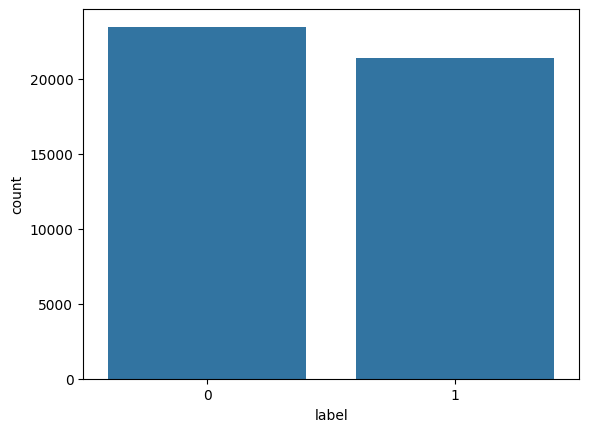

In [30]:
import seaborn as sns
sns.countplot(x=y)

In [31]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [32]:
X_final

array([[   0,    0,    0, ..., 3914, 1137,  356],
       [   0,    0,    0, ..., 3153,  191, 2171],
       [   0,    0,    0, ..., 2246, 1137,  356],
       ...,
       [   0,    0,    0, ..., 3017,  395,  828],
       [   0,    0,    0, ...,  528, 1578, 4849],
       [4452, 4191, 1414, ...,  570, 2626, 1810]], dtype=int32)

In [33]:
y_final

array([0, 0, 0, ..., 0, 1, 1])

In [34]:
X_final.shape

(44898, 300)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [36]:

model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8205 - loss: 0.3755 - val_accuracy: 0.9692 - val_loss: 0.1070
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9781 - loss: 0.0752 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9882 - loss: 0.0434 - val_accuracy: 0.9859 - val_loss: 0.0530
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9685 - val_loss: 0.0963
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9845 - val_loss: 0.0537
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9916 - loss: 0.0287 - val_accuracy: 0.9866 - val_loss: 0.0451
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.9884 - val_loss: 0.0400
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9940 - loss: 0.0210 - val_acc

#Metricss

In [37]:
y_pred=model.predict(X_test)


281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [38]:
y_pred_final=np.where(y_pred>=0.5,1,0)

<Axes: >

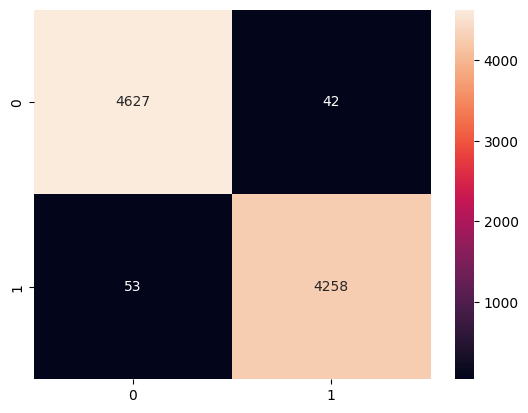

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_final),annot=True,fmt='d')

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_final)

0.9894209354120267

In [41]:
import pickle

preprocess_data = {
    "voc_size": voc_size,
    "sen_len": sen_len,
    "stop_words": stop_words,
    "stemmer": ps
}

with open("preprocess.pkl", "wb") as f:
    pickle.dump(preprocess_data, f)


In [42]:
from google.colab import files
files.download("preprocess.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
model.save("fake_news_lstm.h5")


In [44]:
files.download("fake_news_lstm.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>